### 파이토치 써보기: 회귀 2
딥러닝 회귀 모델에 파이토치 써 보기 - https://github.com/MyungKyuYi/AI-class/blob/main/abalone_regression.ipynb 참고

회귀 1 과 모델 정의, 학습 방법이 다름 - nn.Sequential 활용해서 층 제작+층 정리+활성화 함수 추가까지 한 번에

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

#### 데이터 다루기

In [2]:
# 데이터 생성

df = pd.read_csv('../diabetes.csv')  # CSV 파일 경로

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 입력과 타겟 분리
X = df.drop(['Outcome', 'BMI'], axis=1).values
y = df['BMI'].values.astype(np.float32)

# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

In [4]:
# PyTorch tensors 형태로 바꿈
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
    # TensorDataset: 여러 개의 텐서를 묶어 한 쌍으로 만듦. 여기선 X_train[i], y_train[i]를 합쳐 한 쌍으로 만들어 줌.
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    # DataLoader: 데이터셋을 batch_size만큼 묶은 뒤, 특히 for문 등에서 한 묶음씩 꺼내주는 역할을 하는 객체.

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([614, 7]),
 torch.Size([154, 7]),
 torch.Size([614, 1]),
 torch.Size([154, 1]))

#### 모델 정의, 학습: 2번째 방법
nn.Sequential 활용해서 층 제작+층 정리+활성화 함수 추가까지 한 번에

In [10]:
# 회귀 모델 정의 2
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(7, 64), # X의 특징 개수가 7개
            nn.ReLU(), # 활성화 함수
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1) # 회귀는 분류 클래스를 1개로 둬야 함
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = RegressionModel().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
# 모델 2 학습

# Variables to store loss
train_losses = []

num_epochs = 50

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        
        output = model(X_batch)
        loss = criterion(output, y_batch)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_dataloader):.4f}")
    train_losses.append(total_loss / len(train_dataloader))

print("Training complete.")

Epoch 1, Loss: 1082.6533
Epoch 2, Loss: 1026.1608
Epoch 3, Loss: 946.9256
Epoch 4, Loss: 827.4370
Epoch 5, Loss: 643.0661
Epoch 6, Loss: 448.8643
Epoch 7, Loss: 251.1240
Epoch 8, Loss: 132.6970
Epoch 9, Loss: 93.3637
Epoch 10, Loss: 79.3586
Epoch 11, Loss: 74.2656
Epoch 12, Loss: 73.7206
Epoch 13, Loss: 73.7643
Epoch 14, Loss: 68.9175
Epoch 15, Loss: 67.5459
Epoch 16, Loss: 64.6941
Epoch 17, Loss: 66.9958
Epoch 18, Loss: 64.8029
Epoch 19, Loss: 61.2278
Epoch 20, Loss: 59.7267
Epoch 21, Loss: 58.1684
Epoch 22, Loss: 56.7729
Epoch 23, Loss: 57.4998
Epoch 24, Loss: 54.9815
Epoch 25, Loss: 57.0544
Epoch 26, Loss: 54.2720
Epoch 27, Loss: 52.8575
Epoch 28, Loss: 53.6120
Epoch 29, Loss: 50.5374
Epoch 30, Loss: 50.4053
Epoch 31, Loss: 49.3070
Epoch 32, Loss: 50.2146
Epoch 33, Loss: 48.1468
Epoch 34, Loss: 54.3455
Epoch 35, Loss: 48.3969
Epoch 36, Loss: 48.4003
Epoch 37, Loss: 46.4494
Epoch 38, Loss: 45.9359
Epoch 39, Loss: 44.6883
Epoch 40, Loss: 45.0744
Epoch 41, Loss: 45.6589
Epoch 42, Loss:

#### 모델 평가

In [12]:
# 평가
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
print(f"Test MSE: {mse:.4f}")

Test MSE: 65.0743


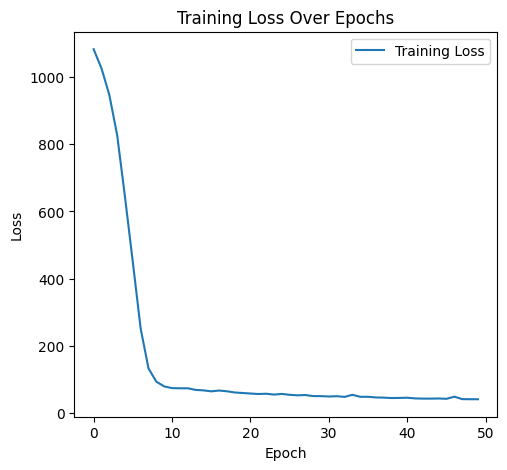

In [13]:
# Plot the loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()